# <div style=" text-align: center; font-weight: bold">Phase 03: Exploratory data analysis</div>


## **1. Import necessary Python modules**

In [87]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
# !pip install plotly
import plotly.express as px
# !pip install scikit-learn
from sklearn.preprocessing import OrdinalEncoder


## **2. Đặt câu hỏi**
### **2.1 Đọc dữ liệu từ file**


In [88]:
real_estate_for_sale_df = pd.read_csv('../Data/cleaned_real_estate_for_sale.csv', encoding='utf-8')
real_estate_for_sale_df.head()

,Type,Area(m2),Price(VNĐ),Bedroom(Phòng),Floor(Tầng),Furniture,Legal,Posting date,District,Project
0,Nhà riêng,66.0,NaN,4,3,Không có thông tin,Sổ đỏ và sổ hồng,5/3/2025,9,Không
1,Căn hộ chung cư,55.0,2.700000e+09,1,3,Nội thất đầy đủ,Sổ đỏ và sổ hồng,5/3/2025,9,Dự án Fuji Residence
2,Nhà riêng,109.0,2.380000e+10,5,3,Không có thông tin,Sổ đỏ và sổ hồng,5/15/2025,10,Không
3,Nhà riêng,92.5,9.100000e+09,4,3,Nội thất đầy đủ,Sổ đỏ và sổ hồng,5/13/2025,7,Không
4,Nhà riêng,80.0,7.500000e+09,4,4,Nội thất đầy đủ,Sổ đỏ và sổ hồng,5/14/2025,7,Không


### **2.2 Câu hỏi 01: Số lượng bất động sản được phân bố như thế nào theo quận tại Thành phố Hồ Chí Minh? Quận nào có nhiều bất động sản nhất? Loại bất động sản nào là đặc trưng cho mỗi quận?**
Là một người mua, khi có nhu cầu tìm kiếm bất động sản, chúng ta muốn chọn bất động sản phù hợp nhất với yêu cầu của mình. Nhưng trước đó, chúng ta cần hiểu về tình trạng hiện tại của thị trường bất động sản tại quận mà mình định tìm kiếm. Bằng cách trả lời câu hỏi này, chúng ta sẽ có thêm kiến thức về sự phân bố hiện tại của từng loại bất động sản trên các quận.

Trước tiên, hãy trích xuất các cột Type và District của dataframe.

In [89]:
real_estate_by_district_df = real_estate_for_sale_df[['Type', 'District']]

#### **1.1 Số lượng bất động sản tại mỗi quận**
Bây giờ, chúng ta sẽ xem xét cách bất động sản được phân bố theo quận. Chúng ta sẽ sử dụng biểu đồ cột để hiển thị số lượng bất động sản hiện có tại một quận.

In [90]:
district_count = real_estate_by_district_df['District'].value_counts().reset_index()

In [91]:

district_count.sort_values(ascending = False ,by='count', inplace= True)
mean_of_count = np.mean(district_count['count'])
fig = px.bar(district_count,
              x='count',
              y='District', orientation='h', color='count',
             color_continuous_scale='viridis_r', title='<b>Total amount of real estate by districts </b>',
             labels={'count': '<b>Count</b>', 'District': '<b>District</b>'})

fig.update_layout(
               title_font_size = 30,
               width = 1000,
               height = 700,
               margin=dict(l=20, r=30, t=70, b=20),
               paper_bgcolor='#ffe6cc',
               xaxis=dict(tickfont=dict(size=16)),
               yaxis=dict(tickfont=dict(size=16), ticksuffix = "  ")
               )
fig.update_traces(marker_line_color='black', marker_line_width=1.0, hovertemplate='<b>%{x}</b> real estates are located in <b>district %{y}</b>')
fig.show(config=dict({'scrollZoom':False}))

Dựa trên biểu đồ, chúng ta có thể thấy rằng có sự phân bố không đồng đều của các bất động sản đang được bán tại Thành phố Hồ Chí Minh, trong đó phần lớn tập trung ở Quận 7, Quận 2, Quận 9. Đặc biệt, Quận 9 có số lượng bất động sản cao nhất . Điều này cho thấy nếu chúng ta muốn có nhiều lựa chọn hơn về bất động sản, những quận này là những địa điểm tiềm năng.

#### **1.2 Phân bố các loại bất động sản tại mỗi quận**

Bây giờ, hãy xem loại bất động sản đặc trưng cho mỗi quận là gì.  
Để làm điều này, chúng ta sẽ tính **tỷ lệ phần trăm** của từng loại bất động sản tại mỗi quận.

In [92]:
district_type_df = real_estate_for_sale_df[['Type', 'District']]
# Group by and find the count of each type in each district.
district_type_df = district_type_df.groupby('District')['Type'].value_counts().reset_index(name = 'Count')

district_type_df.loc[:, 'Percentage'] = (district_type_df.loc[:,'Count'] / district_type_df.groupby('District')['Count'].transform('sum'))*100
district_type_df.loc[:, 'Percentage'] = district_type_df.loc[:, 'Percentage'].round(2)


Bây giờ, đối với mỗi quận, chúng ta sẽ vẽ một biểu đồ tròn để hiển thị tỷ lệ phần trăm của từng loại hình bất động sản trong quận đó.

In [93]:
fig = px.pie(
            district_type_df,
            names ='Type',
            values = 'Percentage',
            color = 'Type',
            labels={ 'District': '<b>Quận</b>'},
            facet_col='District',
            facet_col_wrap = 4,
            facet_col_spacing=0.04,
            facet_row_spacing= 0.04, 
            color_discrete_map= {
                                'Nhà mặt phố': '#78D6C6',
                                'Nhà riêng' : '#F5FCCD',
                                'Căn hộ chung cư': '#4ba775',
                                'Nhà biệt thự, liền kề' : '#17526e',
                                'Đất bán': '#088395',
                                'Đất nền dự án': '#071952'
                                }
            )

fig.update_layout(
    width=1100, height=1500,
    margin=dict(l=20, r=20, t=90, b=20),
    paper_bgcolor='#ffe6cc',
    title='<b>Percentage Distribution of Real Estate Types by District</b>',
    title_font_size=25,
)
fig.update_traces(
    marker_line_color='black', marker_line_width=0.5, hovertemplate='<b>%{label}</b> has the percentage of <b>%{value}%</b>',textposition='inside', insidetextorientation='radial')

fig.show()


### **Câu hỏi 2.3: Giá của từng loại bất động sản được phân bố như thế nào theo các quận? Dựa trên thông tin này, đưa ra nhận xét về quận nào sẽ có giá hợp lý (rẻ hơn) so với các quận khác cho từng loại bất động sản?**

Khi tìm kiếm bất động sản với tư cách là người mua, ngoài số lượng, giá cả cũng là một yếu tố quan trọng. Một bất động sản tiềm năng là bất động sản nằm ở vị trí tốt và có mức giá hợp lý. Câu hỏi này sẽ cung cấp cái nhìn tổng quan về tình hình giá cả của từng loại bất động sản trên tất cả các quận, giúp dễ dàng áp dụng khi tìm kiếm một loại bất động sản cụ thể.

#### **2.3.1 Giá tổng quan của từng loại bất động sản**

Trước tiên, hãy xem xét giá tổng quan của từng loại bất động sản để có cái nhìn tổng thể về tình trạng giá hiện tại của mỗi loại bất động sản.

In [94]:
# Find the average price of each type
price_by_type_df = real_estate_for_sale_df.copy().groupby('Type')['Price(VNĐ)'].agg('mean').reset_index()
price_by_type_df = price_by_type_df.sort_values(by=['Price(VNĐ)'], ascending=[False])

In [95]:
fig = px.bar(price_by_type_df ,
                x = 'Price(VNĐ)', 
                y = 'Type',
                text='Price(VNĐ)',
                labels={'Price(VNĐ)': '<b>Price(VNĐ)</b>', 'Type': '<b>Type</b>'},
                color='Price(VNĐ)',
                color_continuous_scale='Blues'
                )

fig.update_layout(
    title_text= f'<b>The average price of each real estate type </b>',
    title_font_size=15,
    width=1000,
    height= 400,
    margin=dict(l=20, r=30, t=70, b=0),
    paper_bgcolor='#ffe6cc',
    xaxis=dict(tickfont=dict(size=14)),
    yaxis=dict(tickfont=dict(size=14), ticksuffix = " "),
)
fig.update_traces(marker_line_color='black', marker_line_width=1, hovertemplate='The average price of <b>%{y}</b> is %{x}')

fig.show()

Chúng ta có thể thấy, trong tất cả các loại bất động sản, giá trung bình của `Căn hộ chung cư` và `Condotel` là thấp nhất, trong khi giá trung bình của `Nhà mặt phố` và `Nhà biệt thự, liền kề` là cao nhất

#### **2.3.2 Phân bố giá của từng loại bất động sản theo các quận**

Bây giờ, chúng ta sẽ phân tích sâu hơn về giá của từng loại bất động sản, xem giá của chúng được phân bố như thế nào trên các quận.

In [96]:
types = real_estate_for_sale_df['Type'].unique()

# Create a dictionary to store the data about all the district that have the current real estate type
type_and_most_occur_district = {}

for type in types:
     df = district_type_df[(district_type_df['Type'] == type ) & (district_type_df['Percentage'] >0)]
     type_and_most_occur_district[type] = df['District'].to_list()


In [97]:
type_and_district_dict = {}

for type, districts in type_and_most_occur_district.items():
    
    df = real_estate_for_sale_df[(real_estate_for_sale_df['Type'] == type) & (real_estate_for_sale_df['District'].isin(districts))].dropna()

    type_and_district_dict[type] = df

Chúng ta có thể thấy giá (`Price`) có nhiều giá trị khác nhau, vì vậy chúng ta sẽ chia chúng thành các nhóm (bins). Bây giờ, hãy xác định các nhóm (phạm vi của mỗi nhóm được tham khảo từ trang web gốc).

In [98]:
# Define the bins
price_bins = {
    '< 1 billion' : (0, 1000000000),
    '1 billion - 5 billion' : (1000000000, 5000000000),
    '5 billion - 10 billion' : (5000000000, 10000000000),
    '10 billion - 30 billion' : (10000000000, 30000000000),
    '> 30 billion' : (30000000000, float(np.inf)),  
}

In [99]:
# Funtion to set the new range
def map_price_range(price):
    for label, (lower, upper) in price_bins.items():
        if lower <= price < upper:
            return label
    return None

In [100]:
# Apply function to convert the price into the range.
for type, value  in type_and_district_dict.items():
    modified_df = value.copy()

    modified_df['Price Range'] = modified_df['Price(VNĐ)'].apply(map_price_range)

    modified_df = modified_df[['District', 'Price(VNĐ)', 'Price Range']]

    type_and_district_dict[type] = modified_df


In [101]:
# Find the count and percentage for all the income range of each types
for type, value in type_and_district_dict.items():
    value = value.groupby('District')['Price Range'].value_counts().reset_index(name = 'Count')
    value.loc[:,'Percentage'] = ((value['Count'] / value.groupby('District')['Count'].transform('sum'))*100)
    value['Percentage'] = value['Percentage'].round(2)
    value = value.sort_values(by=['District','Percentage'], ascending=[True, False])
    type_and_district_dict[type] = value

Sử dụng hàm dưới đây để thể hiện phân bố thu nhập theo phần trăm cho từng loại dữ liệu. Biểu đồ sẽ là biểu đồ cột chồng (stacked bar chart), với mỗi cột đại diện cho `Quận`, và trong mỗi cột, sự phân bố của các khoảng giá sẽ được hiển thị.

In [102]:
def Price_distribution_of_type(type):
    value = type_and_district_dict[type]
    fig = px.bar(value ,
                x = 'District', 
                y = 'Count',
                color='Price Range',
                text='Percentage',
                labels={'Percentage': '<b>Percentage</b>', 'Price Range': '<b>Price Range</b>', 'Count': '<b>Count</b>', 'District': '<b>District</b>'},
                category_orders={'Price Range':  ['< 1 billion', '1 billion - 5 billion', '5 billion - 10 billion', '10 billion - 30 billion','> 30 billon'],},
                barmode='stack',
                )

    fig.update_layout(
        title_text= f'<b>Price distribution of {type} by district</b>',
        title_font_size=15,
        width=1100,
        height= 650,
        margin=dict(l=20, r=30, t=70, b=0),
        paper_bgcolor='#ffe6cc',
        xaxis=dict(tickfont=dict(size=14)),
        yaxis=dict(tickfont=dict(size=14), ticksuffix = " "),
    )

    fig.update_layout(legend=dict(
    orientation="h", yanchor="bottom", y=1, xanchor="right", x = 1))
    fig.update_traces(marker_line_color='black', marker_line_width=1, hovertemplate='<b>%{text}</b> (%) of '+f'<b>{type}</b>'+ ' in %{x} have price in range <b>%{fullData.name}</b>')

    fig.show()


In [103]:
def mean_price_by_district(type):
    
    price_by_district_df = real_estate_for_sale_df[real_estate_for_sale_df['Type'] == type].groupby('District')['Price(VNĐ)'].agg('mean').reset_index()
    price_by_district_df = price_by_district_df.sort_values(by=['Price(VNĐ)'], ascending=[True])
    price_by_district_df['Price(VNĐ)'] = price_by_district_df['Price(VNĐ)'].round(2)
    
    fig = px.bar(price_by_district_df,
                y = 'Price(VNĐ)', 
                x = 'District',
                text='Price(VNĐ)',
                labels={'Price(VNĐ)': '<b>Price(VNĐ)</b>', 'Type': '<b>Type</b>', 'District': '<b>District<b>'},
                color='Price(VNĐ)',
                color_continuous_scale='Blues'
                )
    fig.update_layout(
        title_text= f'<b>The average price of {type} by district </b>',
        title_font_size=15,
        width=1000,
        height= 400,
        margin=dict(l=20, r=30, t=70, b=20),
        paper_bgcolor='#ffe6cc',
        xaxis=dict(tickfont=dict(size=14)),
        yaxis=dict(tickfont=dict(size=14), ticksuffix = " "),
    )
    fig.update_traces(marker_line_color='black', marker_line_width=1, hovertemplate='The average price of '+ f'<b>{type}</b>' + ' in district <b>%{x}</b> is %{y}')

    fig.show()

Trong câu hỏi này, để tìm ra vị trí tiềm năng nhất cho từng loại bất động sản, chúng ta sẽ xem xét ba yếu tố:
- **Giá tổng trung bình của loại bất động sản ở mỗi quận**: Cung cấp cái nhìn tổng quan về giá của loại bất động sản này tại mỗi quận.
- **Tổng số lượng của loại bất động sản hiện có trong quận**: Để đánh giá thị trường hiện tại của loại bất động sản này ở mỗi quận.
- **Phân bố khoảng giá của loại bất động sản trong quận**: Thể hiện sự khác biệt giữa các khoảng giá trong quận.

Tôi cho rằng, một vị trí phù hợp là nơi có tỷ lệ cân bằng giữa các yếu tố này. Vì vậy, đối với mỗi loại bất động sản, ưu tiên của chúng ta là so sánh các yếu tố này giữa các quận với nhau để đưa ra kết luận có ý nghĩa về vị trí tốt nhất cho từng loại.

##### **Type Nhà riêng:**

In [104]:
mean_price_by_district('Nhà riêng')

Hiện tại, `Quận 4`, `Quận 8`, `Quận 12` và `Quận 9` có thể được xem là những quận rẻ nhất đối với `Nhà riêng`. Ngoài ra, với mức giá trung bình trên `15 tỷ VND`, `Quận 1` là nơi có `Nhà riêng` đắt nhất.

In [105]:
Price_distribution_of_type('Nhà riêng')

Dựa vào biểu đồ phân bố giá của loại bất động sản `Nhà riêng` theo các quận, có thể rút ra một số nhận xét sau:

- Phần lớn các quận có tỷ lệ lớn `Nhà riêng` nằm trong khoảng giá từ `5 tỷ - 10 tỷ` và `10 tỷ - 30 tỷ`, cho thấy đây là mức giá phổ biến của loại hình này tại TP.HCM.
- Một số quận ngoại thành như `Củ Chi`, `Bình Chánh`, `Hóc Môn`, `Quận 12` có tỷ lệ cao các bất động sản giá rẻ hơn (`< 5 tỷ`), tuy nhiên tổng số lượng lựa chọn ở các quận này không nhiều.
- Các quận trung tâm như `Quận 1`, `Quận 3`, `Phú Nhuận`, `Tân Bình`, `Bình Thạnh` có tỷ lệ lớn các bất động sản ở mức giá cao (`> 30 tỷ`), phù hợp với nhóm khách hàng cao cấp.
- Những quận như `Bình Thạnh`, `Gò Vấp`, `Tân Bình` vừa có số lượng `Nhà riêng` lớn, vừa có mức giá trung bình và phân bổ đa dạng, phù hợp với nhiều đối tượng khách hàng khác nhau.
- Nhìn chung, nếu ưu tiên giá rẻ và vẫn muốn có nhiều lựa chọn, `Quận 12` là lựa chọn phù hợp nhất cho loại hình `Nhà riêng`. Nếu muốn nhiều lựa chọn hơn ở phân khúc trung bình và cao cấp, có thể cân nhắc các quận trung tâm và lân cận như `Bình Thạnh`, `Gò Vấp`, `Tân Bình`.

##### **Type Căn hộ chung cư:**

In [106]:
mean_price_by_district('Căn hộ chung cư')

Nhìn vào biểu đồ giá trung bình của `Căn hộ chung cư` theo quận, có thể rút ra một số nhận xét sau:

- Hầu hết các quận đều có giá trung bình dưới `6 tỷ`, cho thấy giá căn hộ chung cư tại TP.HCM khá dễ tiếp cận so với các loại bất động sản khác.
- `Hóc Môn` là quận có giá trung bình rẻ nhất cho căn hộ chung cư.
- `Quận 1` có giá trung bình căn hộ cao vượt trội, gần gấp đôi các quận còn lại, phản ánh vị trí trung tâm và giá trị thương mại cao.
- Các quận như `Quận 2`, `Quận 7`, `Bình Thạnh` cũng có giá trung bình cao hơn mặt bằng chung, phù hợp với phân khúc căn hộ cao cấp hoặc có nhiều dự án mới.
- Nhìn chung, nếu muốn tìm căn hộ chung cư giá rẻ, nên ưu tiên các quận vùng ven như `Hóc Môn`, `Quận 12`, `Bình Tân`. Nếu muốn nhiều lựa chọn đa dạng về phân khúc, có thể cân nhắc `Quận 2`, `Quận 7`, `Bình Thạnh`.

In [107]:
Price_distribution_of_type('Căn hộ chung cư')

##### **Type Nhà mặt phố:**

In [108]:
mean_price_by_district('Nhà mặt phố')

- Biểu đồ thể hiện sự chênh lệch rất lớn về giá trung bình của loại hình `Nhà mặt phố` giữa các quận tại TP.HCM. 
- Các quận trung tâm như `Quận 1`, `Quận 3`, `Quận 10` có giá trung bình cao vượt trội, lên tới hơn 30 tỷ đồng, phản ánh giá trị thương mại và vị trí đắc địa của các bất động sản mặt phố tại đây.
- Ngược lại, các quận vùng ven như `Bình Chánh`, `Hóc Môn`, `Quận 12`, `Bình Tân` có giá trung bình thấp hơn nhiều, chỉ dao động quanh mức 5-10 tỷ đồng, phù hợp với nhóm khách hàng có ngân sách vừa phải.
- Sự phân hóa này cho thấy vị trí địa lý là yếu tố then chốt quyết định giá trị của bất động sản mặt phố. Nếu ưu tiên giá rẻ, nên cân nhắc các quận vùng ven, còn nếu muốn đầu tư hoặc kinh doanh, các quận trung tâm sẽ là lựa chọn phù hợp dù giá cao hơn rất nhiều.

In [109]:
Price_distribution_of_type('Nhà mặt phố')

- Biểu đồ phân bố giá của loại hình `Nhà mặt phố` theo quận cho thấy phần lớn các bất động sản thuộc loại này tập trung ở hai khoảng giá cao: `10 tỷ - 30 tỷ` và `> 30 tỷ`. Điều này phản ánh đúng bản chất của loại hình bất động sản này, khi phần lớn các căn nhà mặt phố đều nằm ở các tuyến đường lớn, vị trí đắc địa, thuận tiện cho kinh doanh, giao thông, dịch vụ, nên giá trị rất cao so với các loại hình khác.

- Một số quận vùng ven như `Bình Chánh`, `Quận 12`, `Hóc Môn`, `Bình Tân` có tỷ lệ nhà mặt phố ở mức giá thấp hơn (dưới 10 tỷ), tuy nhiên tổng số lượng lựa chọn ở các quận này không nhiều.

- Các quận trung tâm như `Quận 1`, `Quận 3`, `Quận 10` có tỷ lệ lớn nhà mặt phố ở mức giá rất cao (`> 30 tỷ`), phù hợp với nhóm khách hàng cao cấp hoặc mục đích đầu tư, kinh doanh lớn.

- Nhìn chung, nếu ưu tiên tìm nhà mặt phố giá rẻ, có thể cân nhắc các quận vùng ven như `Bình Chánh`, `Quận 12`, `Hóc Môn`, `Bình Tân`. Tuy nhiên, số lượng lựa chọn không nhiều và vị trí có thể không thuận tiện bằng các quận trung tâm.

##### **Type Nhà biệt thự, liền kề:**

In [110]:
mean_price_by_district('Nhà biệt thự, liền kề')

In [111]:
Price_distribution_of_type('Nhà biệt thự, liền kề')

- Biểu đồ phân bố giá của loại hình `Nhà biệt thự, liền kề` theo quận cho thấy phần lớn các bất động sản thuộc loại này tập trung ở các khoảng giá cao (`> 10 tỷ`), đặc biệt là tại các quận như `District 2`, `District 7`, `Bình Thạnh`, `Quận 9`.

##### **Type Đất bán:**

In [112]:
mean_price_by_district('Đất bán')

In [113]:
Price_distribution_of_type('Đất bán')


Biểu đồ phân bố giá của loại hình `Đất bán` theo quận cho thấy sự khác biệt rõ rệt giữa các khu vực:

- Các quận ngoại thành như `Củ Chi`, `Bình Chánh`, `Hóc Môn`, `Nhà Bè`, `Bình Tân`, `Quận 12` có tỷ lệ lớn đất bán ở mức giá thấp (`< 5 tỷ`), phù hợp với nhóm khách hàng có ngân sách hạn chế hoặc muốn đầu tư dài hạn.
- Các quận trung tâm và cận trung tâm như `Quận 1`, `Quận 3`, `Bình Thạnh`, `Quận 2`, `Quận 7`, `Gò Vấp`, `Tân Bình`, `Tân Phú` có tỷ lệ đất bán ở các mức giá cao hơn, đặc biệt là từ `5 tỷ` trở lên, thậm chí nhiều bất động sản có giá trên `30 tỷ`.
- Một số quận như `Thủ Đức`, `Quận 9` có sự phân bổ giá khá đồng đều ở nhiều khoảng giá, mang lại nhiều lựa chọn cho người mua ở các phân khúc khác nhau.
- Nhìn chung, nếu ưu tiên giá rẻ, các quận vùng ven là lựa chọn phù hợp. Nếu muốn đầu tư hoặc tìm kiếm đất ở vị trí đắc địa, các quận trung tâm sẽ có nhiều lựa chọn ở phân khúc giá cao hơn.


##### **Type Đất nền dự án:**

In [114]:
mean_price_by_district('Đất nền dự án')

In [115]:
Price_distribution_of_type('Đất nền dự án')


- Biểu đồ phân bố giá của loại hình `Đất nền dự án` theo quận cho thấy phần lớn các bất động sản thuộc loại này tập trung ở các khoảng giá từ `5 tỷ - 10 tỷ` và `10 tỷ - 30 tỷ`, đặc biệt nổi bật tại các quận như `Quận 2`, `Quận 7`, `Bình Chánh`, `Nhà Bè`.
- Một số quận vùng ven như `Củ Chi`, `Hóc Môn`, `Bình Chánh` có tỷ lệ lớn đất nền dự án ở mức giá thấp hơn (`< 5 tỷ`), phù hợp với nhóm khách hàng có ngân sách hạn chế hoặc muốn đầu tư dài hạn.
- Các quận trung tâm và cận trung tâm như `Quận 1`, `Quận 3`, `Bình Thạnh`, `Quận 2`, `Quận 7` có tỷ lệ đất nền dự án ở các mức giá cao hơn, đặc biệt là từ `10 tỷ` trở lên.
- Nhìn chung, nếu ưu tiên giá rẻ, các quận vùng ven là lựa chọn phù hợp. Nếu muốn đầu tư hoặc tìm kiếm đất nền dự án ở vị trí đắc địa, các quận trung tâm và cận trung tâm sẽ có nhiều lựa chọn ở phân khúc giá cao hơn.


### **2.4 Câu hỏi 03: Những yếu tố nào sẽ ảnh hưởng đến giá của từng loại bất động sản, mối quan hệ giữa giá và các yếu tố khác là gì?**

Bây giờ, chúng ta sẽ xem xét mối quan hệ giữa giá của từng loại bất động sản với các cột khác. Ở đây, chúng ta muốn tìm hiểu thêm về các yếu tố có thể ảnh hưởng đến giá của một bất động sản. Thông tin này sẽ rất cần thiết cho cả người mua và người bán:
- **Người bán**: Việc hiểu rõ mối quan hệ giữa các yếu tố này giúp người bán xác định mức giá phù hợp cho tài sản của họ, tránh tình trạng định giá quá cao hoặc quá thấp so với giá trị thực tế của bất động sản.
- **Người mua**: Hiểu các yếu tố này cũng giúp quá trình đàm phán giá với người bán diễn ra suôn sẻ hơn. Đồng thời, người mua có thể dễ dàng hình dung các thuộc tính của bất động sản phù hợp với ngân sách hiện tại của họ.

Trước khi đi vào phân tích, trong cột giá có nhiều giá được ghi là `Thỏa thuận`. Trong phân tích này, chúng ta chỉ xem xét các bất động sản có giá cụ thể. Do đó, chúng ta sẽ trích xuất tất cả các giá không phải là `Thỏa thuận` trước tiên.

In [116]:
real_estate_price = real_estate_for_sale_df.copy()

In [117]:
real_estate_price['Type'].value_counts()

Type
Căn hộ chung cư          4986
Nhà riêng                4370
Nhà mặt phố              2125
Đất bán                  1075
Nhà biệt thự, liền kề    1033
Đất nền dự án             881
Condotel                    8
Name: count, dtype: int64

Bây giờ, hãy xem xét mối tương quan giữa mỗi yếu tố với giá.
- Để tính mối tương quan giữa các cột trong dataframe, chúng ta sẽ sử dụng ma trận tương quan. Nhưng trước đó, chúng ta cần chuẩn hóa dataframe:
    - Với các cột số, chúng ta có thể sử dụng trực tiếp.
    - Nhưng với các cột phân loại như `Furniture`, `Legal`, `District`, chúng ta phải chuyển đổi chúng sang kiểu dữ liệu số.

In [118]:
unique_types = ['Nhà riêng', 'Nhà mặt phố', 'Căn hộ chung cư', 'Nhà biệt thự, liền kề', 'Đất bán', 'Đất nền dự án']
real_estate_df_by_type = {}

for house_type in unique_types:
    # Extract the real estates in each type and store into the dictionary
    current_type_df = real_estate_price[real_estate_price['Type'] == house_type].copy().reset_index()
    current_type_df = current_type_df.drop(columns=['index'])
    
    real_estate_df_by_type[house_type] = current_type_df


Bây giờ, đối với mỗi loại bất động sản, hãy xem xét một số giá trị thống kê của chúng.

Các loại `Đất bán`, `Đất nền dự án` sẽ không có các cột `Bedroom(Phòng)`, `Toilet(Phòng)`, `Floor(Tầng)`, `Furniture`, vì vậy hãy loại bỏ chúng trước.

In [119]:
# Drop unecessary columns for these types
real_estate_df_by_type['Đất bán'].drop(columns = ['Bedroom(Phòng)', 'Floor(Tầng)', 'Furniture'], inplace = True)
real_estate_df_by_type['Đất nền dự án'].drop(columns = ['Bedroom(Phòng)', 'Floor(Tầng)', 'Furniture'], inplace = True)

Được rồi, bây giờ với mỗi loại bất động sản, hãy chuyển đổi các cột phân loại thành cột số. Tôi sẽ sử dụng thư viện `Scikit-learn` cho việc chuyển đổi này.

Ở bước này, cột quận chỉ là một cột danh nghĩa, vì vậy chúng ta sẽ xem xét nó sau.

In [120]:
ordinal_encoder = OrdinalEncoder()

columns_to_encode1 = ['Furniture', 'Legal']
columns_to_encode2 = ['Legal']

# Set the other for each level of furniture and legal
furniture_order = ['Không có thông tin', 'Khác', 'Không nội thất', 'Nội thất cơ bản', 'Nội thất đầy đủ', 'Nội thất sang trọng']
legal_order = ['Không có thông tin', 'Khác', 'Đang chờ sổ', 'Hợp đồng mua bán', 'Sổ hồng', 'Sổ đỏ', 'Sổ đỏ và sổ hồng']

ordinal_encoder.categories_ = [None, furniture_order, legal_order]

# Perform the ordinal encoding.
for house_type, df in real_estate_df_by_type.items():
    if house_type in ('Đất bán', 'Đất nền dự án'):
        for column in columns_to_encode2:
            encoded_column = ordinal_encoder.fit_transform(df[[column]])
            df[column] = encoded_column
    else:
        for column in columns_to_encode1:
            encoded_column = ordinal_encoder.fit_transform(df[[column]])
            df[column] = encoded_column
    real_estate_df_by_type[house_type] = df


Bây giờ, chúng ta có thể tìm ra mối tương quan giữa các yếu tố cho từng loại bất động sản. Chúng ta sẽ sử dụng **biểu đồ nhiệt (heatmap)** để trực quan hóa kết quả.

c:\Users\bkphu\anaconda3\Lib\site-packages\seaborn\matrix.py:260: FutureWarning:

Format strings passed to MaskedConstant are ignored, but in future may error or produce different behavior

c:\Users\bkphu\anaconda3\Lib\site-packages\seaborn\matrix.py:260: FutureWarning:

Format strings passed to MaskedConstant are ignored, but in future may error or produce different behavior

c:\Users\bkphu\anaconda3\Lib\site-packages\seaborn\matrix.py:260: FutureWarning:

Format strings passed to MaskedConstant are ignored, but in future may error or produce different behavior

c:\Users\bkphu\anaconda3\Lib\site-packages\seaborn\matrix.py:260: FutureWarning:

Format strings passed to MaskedConstant are ignored, but in future may error or produce different behavior

c:\Users\bkphu\anaconda3\Lib\site-packages\seaborn\matrix.py:260: FutureWarning:

Format strings passed to MaskedConstant are ignored, but in future may error or produce different behavior

c:\Users\bkphu\anaconda3\Lib\site-packages\seaborn

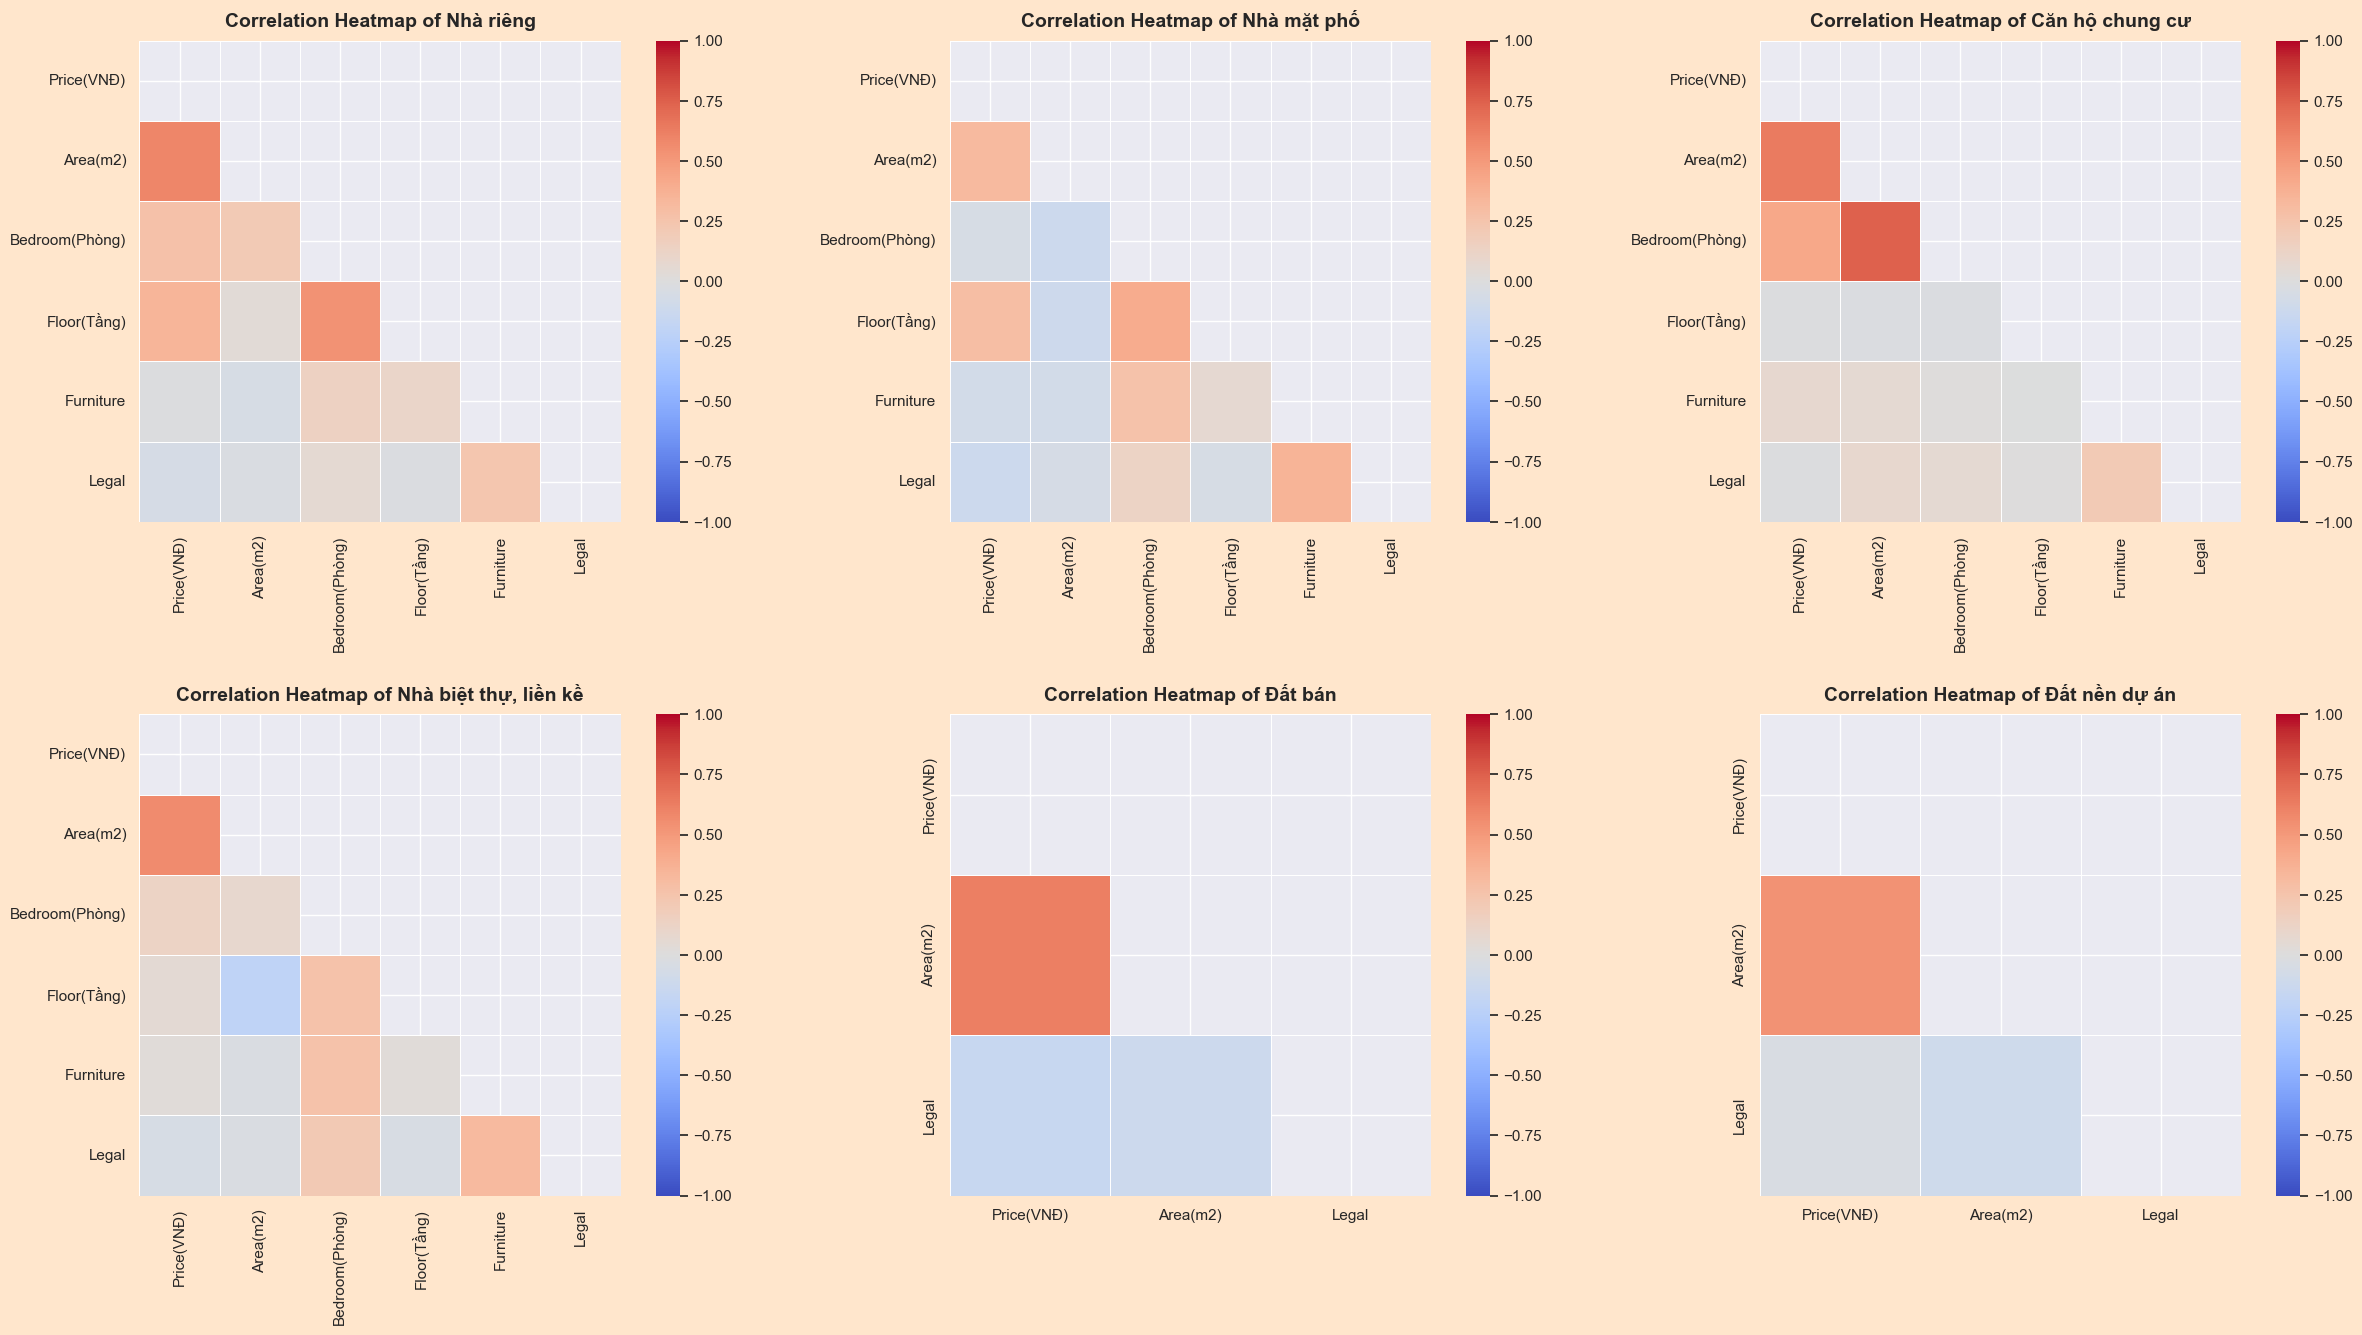

In [121]:
columns_to_correlate1 = ['Price(VNĐ)', 'Area(m2)', 'Bedroom(Phòng)', 'Floor(Tầng)','Furniture', 'Legal']
columns_to_correlate2 = ['Price(VNĐ)', 'Area(m2)', 'Legal']
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(30, 15))
sns.set()
i = 0

for type in real_estate_df_by_type:
    if type in ('Đất bán', 'Đất nền dự án'):
        correlation_matrix = real_estate_df_by_type[type][columns_to_correlate2].corr()
    else:
        correlation_matrix = real_estate_df_by_type[type][columns_to_correlate1].corr()
    ax = axes[i//3, i%3]
    
    mask = np.triu(np.ones_like(correlation_matrix, dtype=bool))
    sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', square=True, linewidth=.5, vmin=-1, vmax=1, ax= ax, mask= mask)
    ax.set_title(f'Correlation Heatmap of {type}', fontsize = '14', fontweight = 'bold', pad = 10)
    i += 1

plt.subplots_adjust(wspace=0.15, hspace=0.4)
fig = plt.gcf()
fig.set_facecolor('#ffe6cc')
plt.show()

### Nhận xét về biểu đồ heatmap tương quan giữa các yếu tố và giá bất động sản

- **Nhà riêng, Căn hộ chung cư:**  
    Giá có tương quan mạnh với diện tích, số phòng ngủ, số toilet. Điều này cho thấy các yếu tố này là tiêu chí quan trọng quyết định giá. Riêng với căn hộ chung cư, số tầng (ý nghĩa là tầng căn hộ) không ảnh hưởng nhiều đến giá, trong khi với nhà riêng, số tầng lại có tương quan cao hơn.

- **Nhà mặt phố:**  
    Giá có tương quan vừa phải với diện tích và số tầng, các yếu tố còn lại ảnh hưởng không đáng kể. Điều này phản ánh giá trị thương mại của nhà mặt phố chủ yếu đến từ vị trí và quy mô.

- **Đất bán, Đất nền dự án:**  
    Giá có tương quan mạnh với diện tích, đồng thời có tương quan âm với quận (District), cho thấy đất ở các quận trung tâm thường có giá cao hơn.

- **Nội thất, pháp lý:**  
    Các yếu tố này nhìn chung có tương quan thấp với giá ở hầu hết các loại hình, cho thấy chúng không phải là yếu tố quyết định chính đến giá bất động sản.


In [122]:
real_estate_df_by_type_district = {}
# Perform one hot encoding for District column.
for type in real_estate_df_by_type:
    df = real_estate_df_by_type[type]['District']
    df = pd.get_dummies(df, columns=['District'])
    df = pd.concat([real_estate_df_by_type[type]['Price(VNĐ)'], df], axis=1)
    real_estate_df_by_type_district[type] = df

In [123]:
def corraltion_price_district(type):
    df = real_estate_df_by_type_district[type]
    corr_matrix = df.corr()
    fig = plt.figure(figsize=(25,8))
    mask = np.triu(np.ones_like(corr_matrix, dtype=bool))
    sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', linewidth=.5,  vmin=-1, vmax=1, mask= mask)
    plt.title(f'Correlation Heatmap between Price and District of {type}', fontsize = '14', fontweight = 'bold', pad = 10)
    fig = plt.gcf()
    fig.set_facecolor('#ffe6cc')
    plt.show()

##### **Type Nhà riêng**

c:\Users\bkphu\anaconda3\Lib\site-packages\seaborn\matrix.py:260: FutureWarning:

Format strings passed to MaskedConstant are ignored, but in future may error or produce different behavior



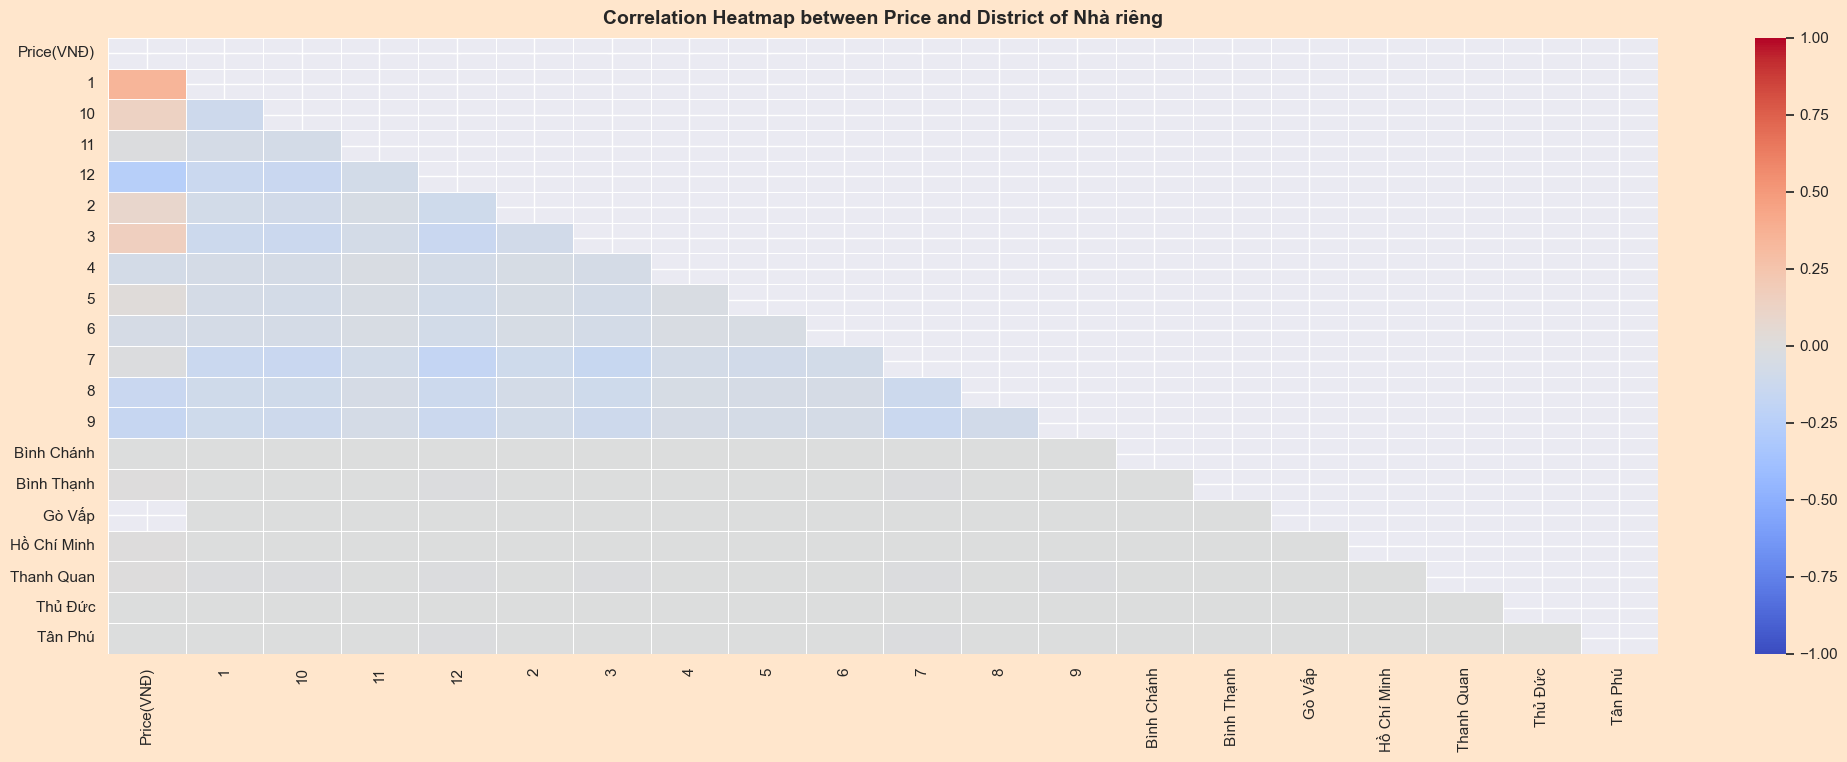

In [124]:
corraltion_price_district('Nhà riêng')

##### **Type Căn hộ chung cư**

c:\Users\bkphu\anaconda3\Lib\site-packages\seaborn\matrix.py:260: FutureWarning:

Format strings passed to MaskedConstant are ignored, but in future may error or produce different behavior



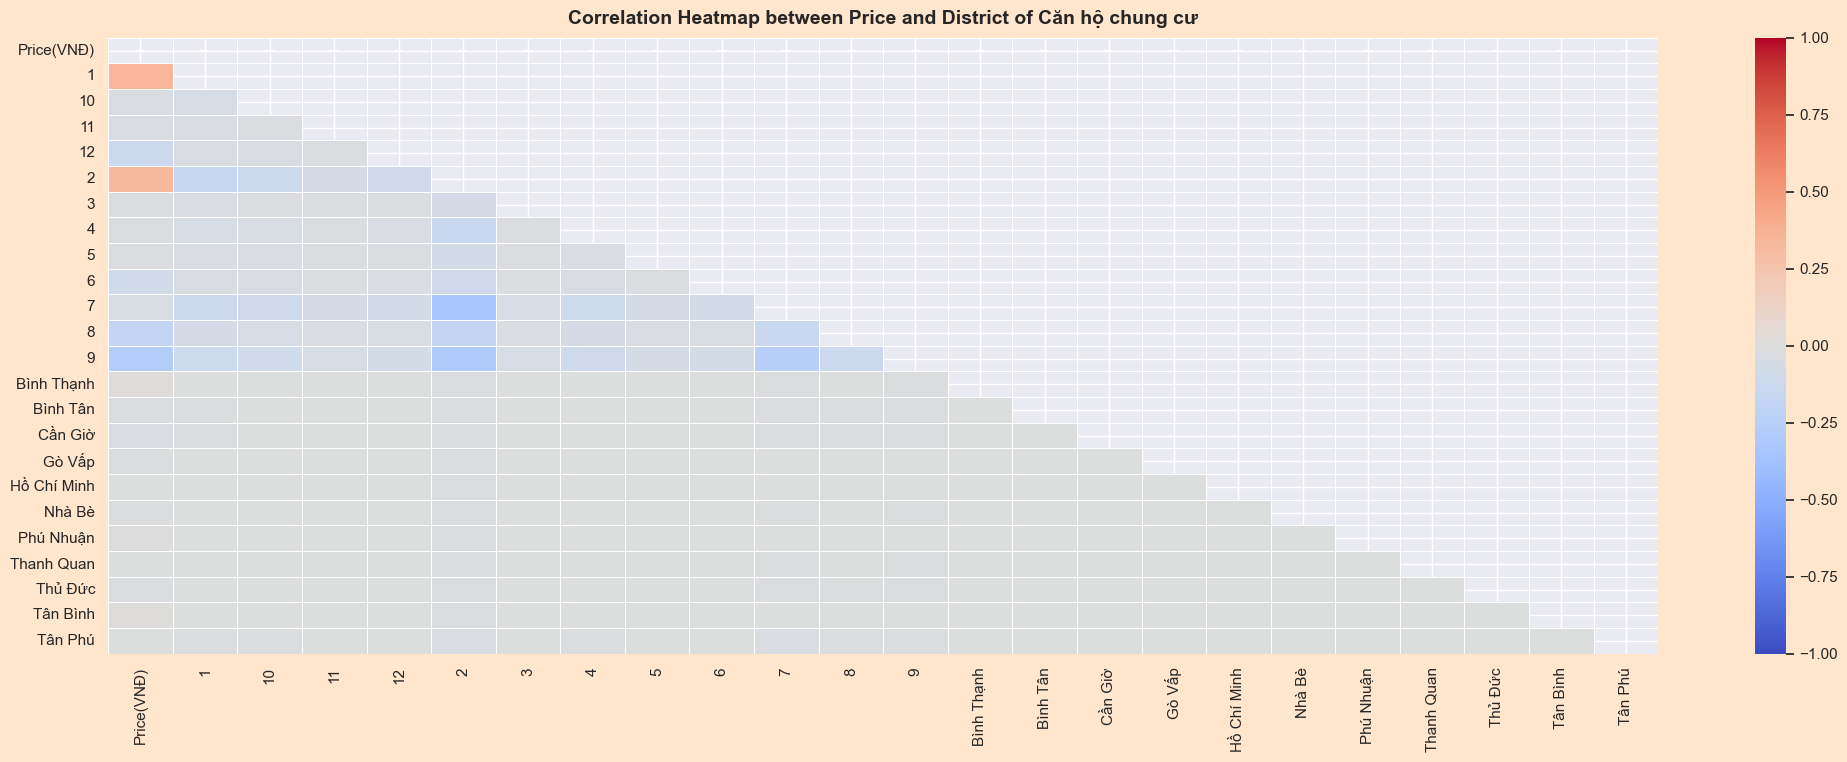

In [125]:
corraltion_price_district('Căn hộ chung cư')

##### **Type Nhà biệt thự, liền kề**

c:\Users\bkphu\anaconda3\Lib\site-packages\seaborn\matrix.py:260: FutureWarning:

Format strings passed to MaskedConstant are ignored, but in future may error or produce different behavior



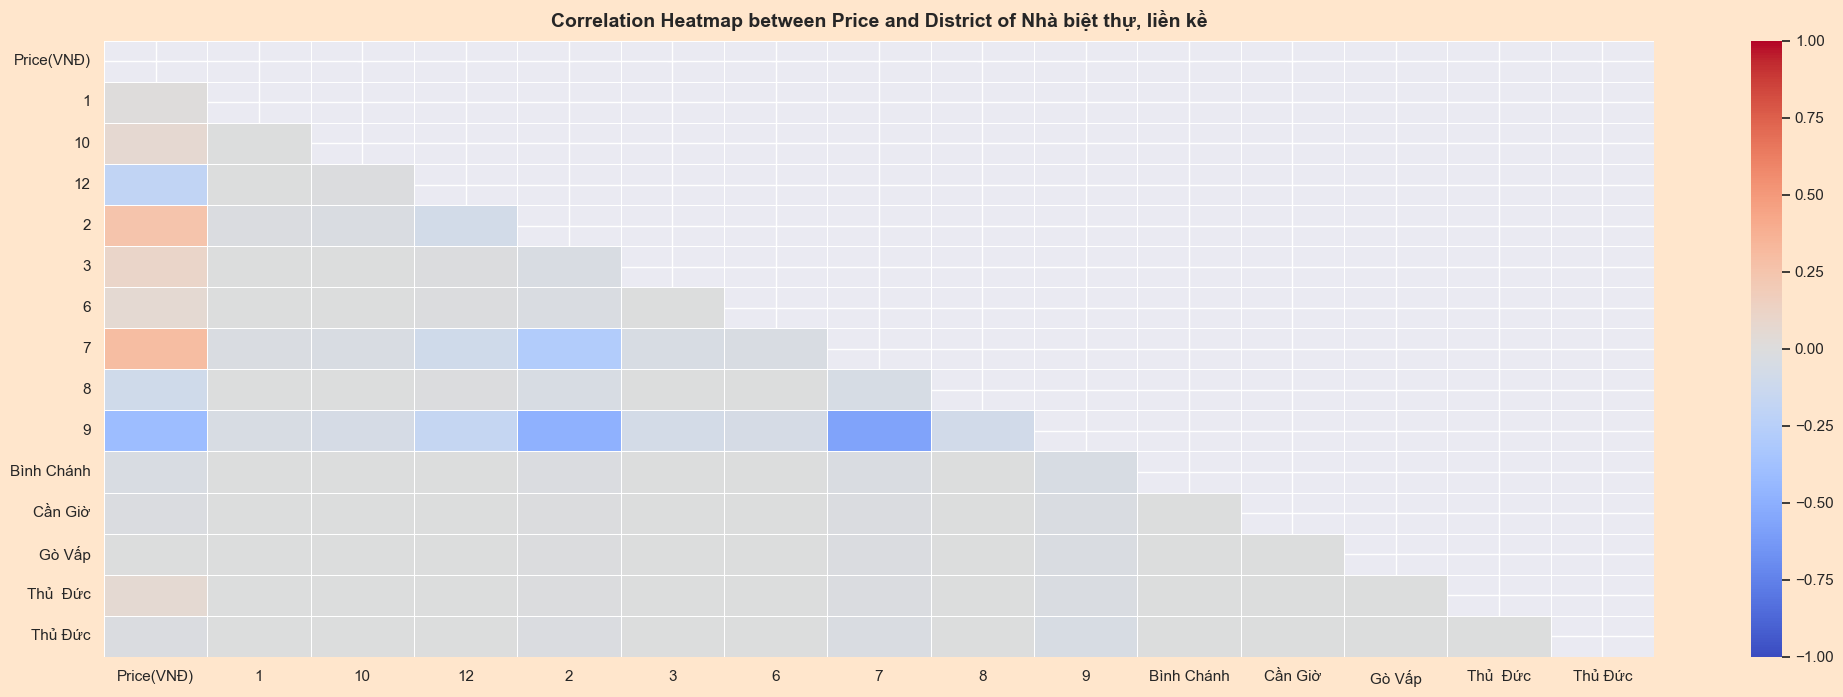

In [126]:
corraltion_price_district('Nhà biệt thự, liền kề')

##### **Type Nhà mặt phố**

c:\Users\bkphu\anaconda3\Lib\site-packages\seaborn\matrix.py:260: FutureWarning:

Format strings passed to MaskedConstant are ignored, but in future may error or produce different behavior



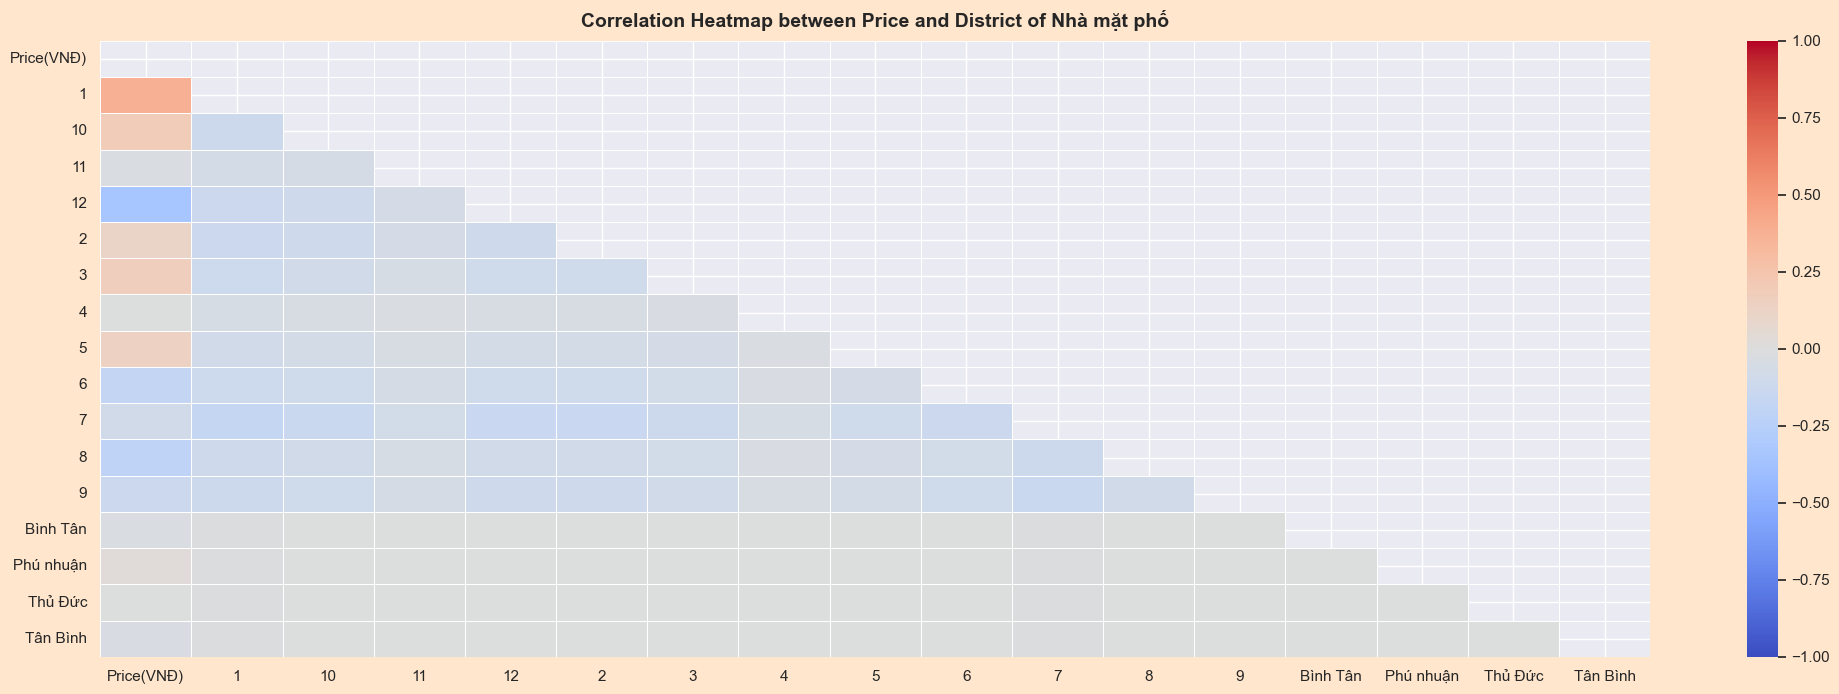

In [127]:
corraltion_price_district('Nhà mặt phố')

##### **Type Đất bán**

c:\Users\bkphu\anaconda3\Lib\site-packages\seaborn\matrix.py:260: FutureWarning:

Format strings passed to MaskedConstant are ignored, but in future may error or produce different behavior



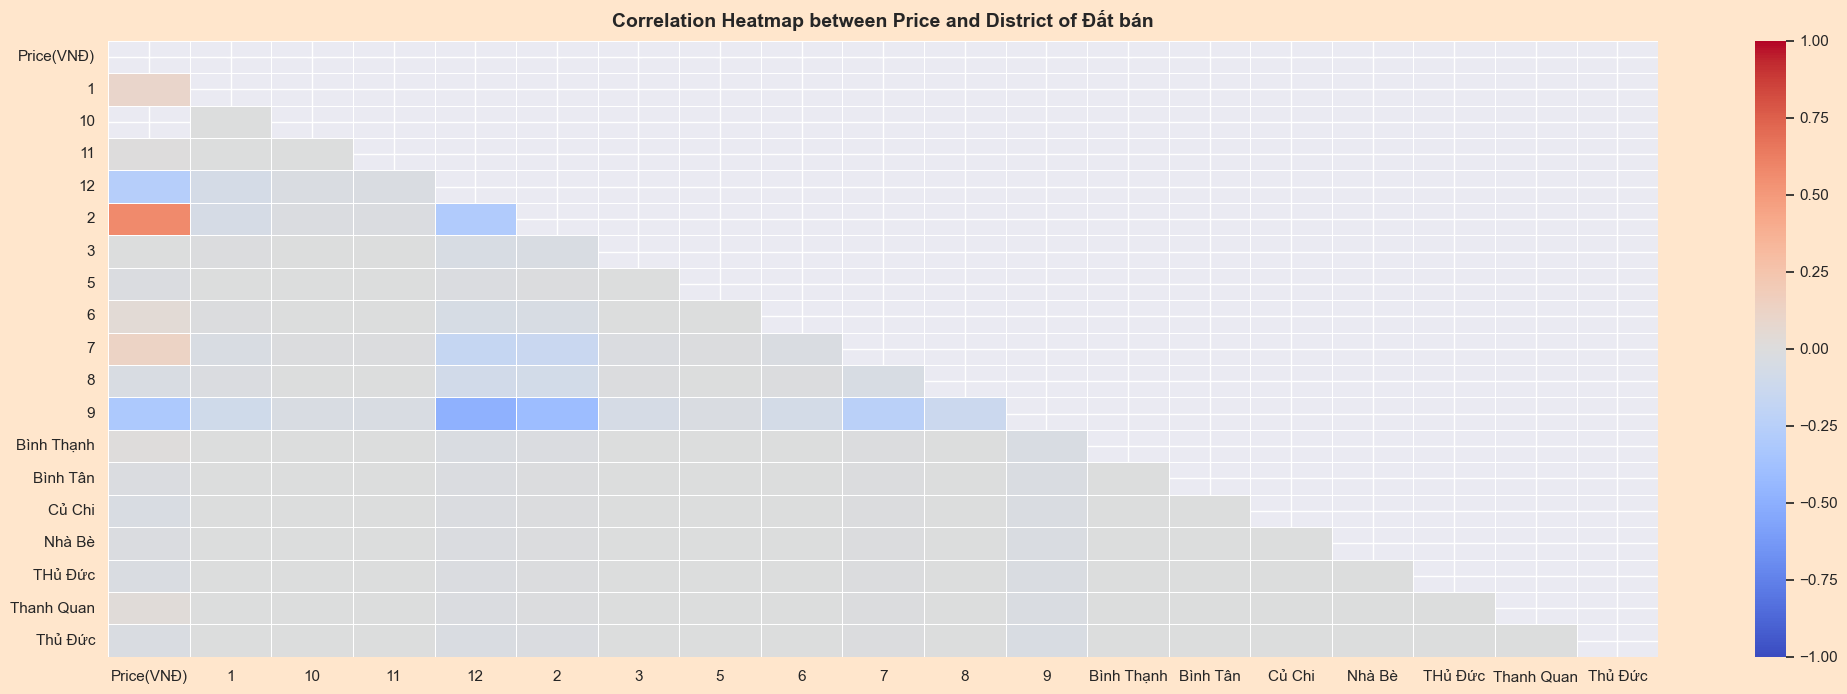

In [128]:
corraltion_price_district('Đất bán')

##### **Type Đất nền dự án**

c:\Users\bkphu\anaconda3\Lib\site-packages\seaborn\matrix.py:260: FutureWarning:

Format strings passed to MaskedConstant are ignored, but in future may error or produce different behavior



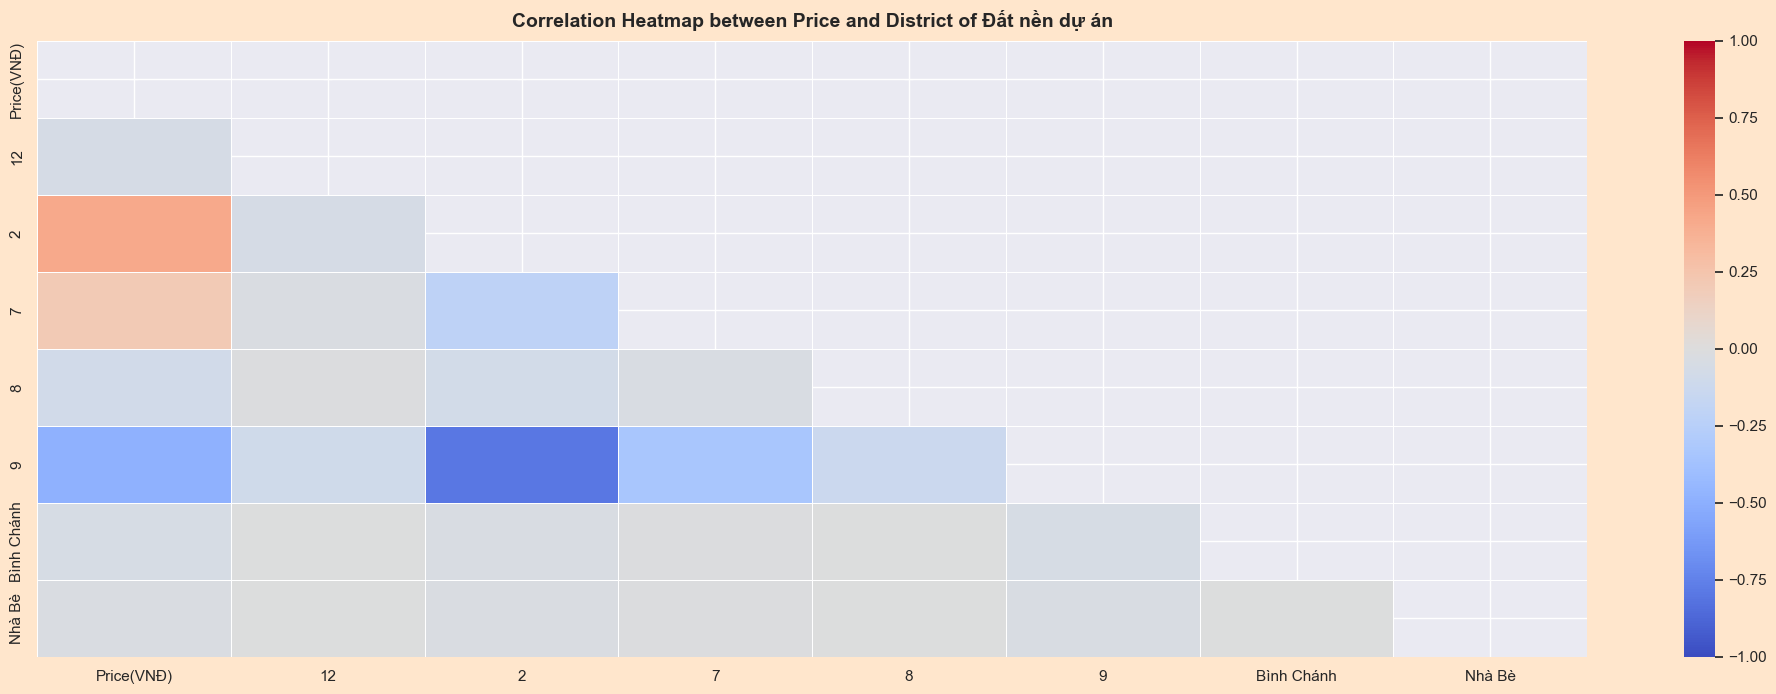

In [129]:
corraltion_price_district('Đất nền dự án')

Như `Đất bán`, `Đất nền dự án` cũng có mối tương quan mạnh giữa `Price` và `Quận 2`, tiếp theo là `Quận 7`, tất cả các quận khác đều có mối tương quan âm với `Price`.

**Tổng quan:**  
- Có thể thấy rằng đối với tất cả các loại bất động sản, có mối tương quan tốt giữa `Price` với `Area`, `Bedroom`, `Toilet`, `Floor` đối với các loại không phải là `Căn hộ chung cư`. Ngoài ra, có mối quan hệ thấp với `Furniture` và `Legal`, cho thấy các yếu tố này không ảnh hưởng nhiều đến `Price` của một bất động sản.  

- Đối với `District`, mối tương quan của `Price` cũng rất khác biệt giữa các quận, theo xu hướng tổng quan, các quận có giá cao đáng chú ý thường có mối tương quan cao hơn với `Price`.